Universidad Galileo  
Maestría en Data Science  
Statistical Learning I
Sección U  


   # **Tarea 3: KNN para identificar raza de perro**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 13 de junio de 2022<br/>
</p>

In [19]:
import warnings
warnings.filterwarnings('ignore')
import datetime, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import imageio as imio
%load_ext tensorboard
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


AttributeError: module 'tensorflow._api.v1.compat.v1.compat' has no attribute 'v1'

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [20]:
training_image_names_array = 'pre-processing/training_image_names_array.npy'
images_inception_features = 'pre-processing/training_inception_features_array.npy'
training_image_labels_array = 'pre-processing/training_image_labels_array.npy'

In [21]:
TRAIN_DICTIONARY_KEYS = ["images", "label", "features"]

training_set_dict = dict()
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)

In [22]:
### Pruebas
# yyy=
len(training_set_dict['label'])
# p=np.eye(len(set(yyy)))[yyy]
# p
test_features = np.load('data/test/test_inception_features_array.npy')
len(test_features[0])

2048

In [5]:
unique, inverse = np.unique(training_set_dict['label'], return_inverse=True)
onehot = np.eye(unique.shape[0])[inverse]
len(onehot[10000])

120

#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [23]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [68]:
#len(images_name)
len(features[0])
features.shape[0]

10222

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


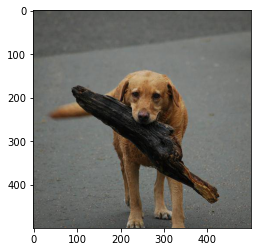

In [24]:
# Indice 4
print('Label: ', labels[4])
print('Nombre: ', images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)

### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes definir tu función para predecir la raza sobre un punto x_predict, a través de buscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite (la moda) correspondiente a esos "k" valores de X_train, este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [70]:
def predict(X_t, y_t, x_t, k_t):
#     neg_one = tf.constant(-1.0, dtype=tf.float64)
    neg_one = tf.constant(-1.0, dtype=tf.float32)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)

    x_t = np.tile(x_t, (X_t.shape[0], 1))
    neg_distances = tf.sqrt(tf.reduce_sum(tf.square(X_t - x_t), 1))
#     neg_distances = tf.norm(tf.subtract(X_t, x_t), ord='euclidean')
#     neg_distances = tf.norm(X_t - x_t, axis=-1)
#     neg_distances = tf.norm(X_t-x_t,ord='euclidean')
    
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s
    

test_features = np.load('data/test/test_inception_features_array.npy')
predict_image = test_features[0]

k_tf = tf.constant(3)
example_tf = test_features[0]
#pr = predict(X_tf, y_tf, example_tf, k_tf)
pr = predict(features, labels, example_tf, k_tf)
sess = tf.Session()
y_index = sess.run(pr)
# print get_label(y_index)
print(y_index)

[b'weimaraner' b'sussex_spaniel' b'tibetan_mastiff']


In [74]:
def get_euclidean_distance(x, y):
#     y = np.tile(y, (x.shape[0], 1))
#     distances = tf.sqrt(tf.reduce_sum(tf.square(x - y), 1))
    
    minus_one = tf.constant(-1.0, dtype = tf.float32)
    distances = tf.reduce_sum(tf.abs(tf.subtract(x, y)), 1)
    distances = tf.multiply(distances, minus_one)
    
#     dist = tf.sqrt(tf.reduce_sum(tf.square(x - y), 1))
    return distances


def predecir_raza_KNN(x_predict, X_train, Y_train, k):
#     def predict(x_t, X_t, y_t, k_t):
    y = None
    distances = self.get_euclidean_distance(x_predict, X_train)
    # get the indices
    vals, indx = tf.nn.top_k(distances, k)
    # slice the labels of these points
    y_s = tf.gather(Y_train, indx)
    return y_s
    
    
test_features = np.load('data/test/test_inception_features_array.npy')
predict_image = test_features[0]

k_tf = tf.constant(3)
example_tf = test_features[0]
#pr = predict(X_tf, y_tf, example_tf, k_tf)
# pr = predict(features, labels, example_tf, k_tf)
pr = predict(example_tf, features, labels, k_tf)
sess = tf.Session()
y_index = sess.run(pr)
# print get_label(y_index)
print(y_index)
    
    
    
#     feature_number = len(X_train[0])
#     x_data_train = tf.compat.v1.placeholder(shape=[None, feature_number], dtype=tf.float32)
#     y_data_train = tf.compat.v1.placeholder(shape=[None, len(Y_train[0])], dtype=tf.float32)
#     x_data_test =  tf.compat.v1.placeholder(shape=[None, feature_number], dtype=tf.float32)

#     # manhattan distance
# #     distance = tf.reduce_sum(tf.abs(tf.subtract(X_train, tf.expand_dims(x_data_test, 1))), axis=2)
#     distance = self.euclideanDistance(X_train, Y_train)

#     # nearest k points
#     _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
#     top_k_label = tf.gather(Y_train, top_k_indices)

#     sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
#     prediction = tf.argmax(sum_up_predictions, axis=1)    
    
#     sess = tf.Session()
#     prediction_outcome = sess.run(prediction, feed_dict={x_data_train: x_vals_train,
#                                                        x_data_test: x_vals_test,
#                                                        y_data_train: y_vals_train})

    # evaluation
#     accuracy = 0
#     for pred, actual in zip(prediction_outcome, y_vals_test):
#         if pred == np.argmax(actual):
#             accuracy += 1
#     print(accuracy / len(prediction_outcome))

    
#     return y #asigna a "y" la predicción resulatnte

TypeError: Input 'y' of 'Sub' Op has type string that does not match type float32 of argument 'x'.

## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [31]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

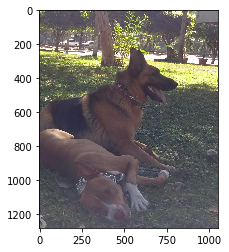

In [32]:
img_test = imio.imread('./data/test/test1.jpg')
plt.imshow(img_test)

In [33]:
predict_image = test_features[0]

## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

### Prueba 2

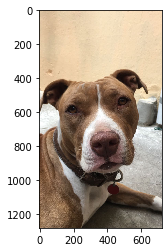

In [34]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [37]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
